# 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

# 30.形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [5]:
# 出力フォーマット:表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
!head -c 1000 neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
どこ	名詞,代名詞,一般,*,*,*,どこ,ドコ,ドコ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
生れ	動詞,自立,*,*,�

In [2]:
keys = ["surface", "pos", "pos1", "base"]
idx = [0, 1, 2, 7]
path = "/Users/seiya.k/workspace/100knock-2020/SeiyaKikuchi/chapter04/neko.txt.mecab"
morpheme_lists = []

with open(path) as f:
    for l in f:
        
        l = l.strip().split("\t")
        
        #stripで消えた改行
        if l[0] == "記号,一般,*,*,*,*,*":
            info = l[0].split(",")
            info[0:0] = ["\n"]
            morpheme_lists.append(info)
            
        #stripで消えた空白
        elif l[0] == "記号,空白,*,*,*,*,\u3000,\u3000,":
            info = l[0].split(",")
            info[0:0] = [" "]
            morpheme_lists.append(info)
            
        #EOSは処理しない
        elif l[0] == "EOS":
            morpheme_lists.append(["EOS"])
        
        #消えた改行、空白の残骸
        elif l[0] == "":
            pass
        
        #一般的な形態素
        else:
            info = l[1].split(",")
            info[0:0] = [l[0]]
            morpheme_lists.append(info)


sentences = []
morphs = []
for m in morpheme_lists:
    if m[0] == "EOS":
        sentences.append(morphs)
        morphs = []
    else:
        dic = {}
        for k, i in zip(keys, idx):
            dic[k] = m[i]
        morphs.append(dic)  

from pprint import pprint
pprint(sentences[:5])

[[{'base': '一', 'pos': '名詞', 'pos1': '数', 'surface': '一'},
  {'base': '*', 'pos': '記号', 'pos1': '一般', 'surface': '\n'}],
 [{'base': '*', 'pos': '記号', 'pos1': '一般', 'surface': '\n'}],
 [{'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': ' '},
  {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
  {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
  {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
  {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
  {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
  {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'},
  {'base': '*', 'pos': '記号', 'pos1': '一般', 'surface': '\n'}],
 [{'base': '名前', 'pos': '名詞', 'pos1': '一般', 'surface': '名前'},
  {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
  {'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'surface': 'まだ'},
  {'base': '無い', 'pos': '形容詞', 'pos1': '自立', 'surface': '無い'},
  {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'},
  {'base': '*

### osモジュール
絶対パスをターミナルから取得しているが、os.getcwd()などで、pythonコード内で取得することができる。処理がコード内で閉じていると、あとで見やすくなる。

# 31.動詞
動詞の表層形をすべて抽出せよ．

In [7]:
[d["surface"] for l in sentences for d in l if d["pos"] == "動詞"][:20]

['生れ',
 'つか',
 'し',
 '泣い',
 'し',
 'いる',
 '始め',
 '見',
 '聞く',
 '捕え',
 '煮',
 '食う',
 '思わ',
 '載せ',
 'られ',
 '持ち上げ',
 'られ',
 'し',
 'あっ',
 '落ちつい']

# 32.動詞の原形
動詞の原形をすべて抽出せよ．

In [8]:
[d["base"] for l in sentences for d in l if d["pos"] == "動詞"][:10]

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える']

# 33.「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [9]:
noun_phrases = []
for sentence in sentences:
    for i, d in enumerate(sentence):#dict_list[:-1]でもout of range
        if d["surface"] == "の":
            if sentence[i - 1]["pos"] == "名詞":
                if sentence[i + 1]["pos"] == "名詞":
                    noun_phrases.append(sentence[i - 1]["surface"] + d["surface"] + sentence[i + 1]["surface"])
print(noun_phrases[:50])

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親', '藁の上', '笹原の中', '池の前', '池の上', '一樹の蔭', '垣根の穴', '隣家の三', '時の通路', '一刻の猶予', '家の内', '彼の書生', '以外の人間', '前の書生', 'おさんの隙', 'おさんの三', '胸の痞', '家の主人', '主人の方', '鼻の下', '吾輩の顔', '自分の住', '吾輩の主人', '家のもの', 'うちのもの', '彼の書斎', '本の上', '皮膚の色', '本の上', '彼の毎夜', '以外のもの', '主人の傍', '彼の膝', '膝の上', '経験の上', '飯櫃の上', '炬燵の上', 'ここのうち', '供の寝床', '彼等の中間', '供の一']


## tryexcept文を使えば、out of rangeを起こしつつも処理は続いてくれる。実験で有用なので、ここでまず使ってみよう

### more-itertoolを使いこなす

# 34.名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [3]:
noun_phrases = []
#dict_listという変数名は型がわからなくなるのでいけない
for sentence in sentences:
    noun_phrase = []
    for d in sentence:
        if d["pos"] == "名詞":
            noun_phrase.append(d["surface"])
        elif d["pos"] != "名詞":
            if len(noun_phrase) >= 2:
                noun_phrases.append("".join(noun_phrase))
                noun_phrase = []
            else:
                noun_phrase = []
        #文が名詞終わりだった場合?
        #elifで,"EOS"が来たら、また下の処理をする
#         if len(noun_phrase) >= 2:
#                 noun_phrases.append("".join(noun_phrase))
#                 noun_phrase = []

print(noun_phrases[:100])

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', 'ぷうぷうと煙', '邸内', '三毛', '書生以外', '四五遍', 'この間おさん', '三馬', '御台所', 'まま奥', '住家', '終日書斎', '勉強家', '勉強家', '勤勉家', '二三ページ', '主人以外', '限り吾輩', '朝主人', '一番心持', '二人', '一つ床', '一人', '最後大変', '——猫', '神経胃弱性', '物指', '尻ぺたをひどく', '言語同断', '家内総がかり', '筋向', '白君', '度毎', '白君', '先日玉', '四疋', '三日目', '四疋', '白君', '我等猫族', '家族的生活', '三毛君', '所有権', '我々同族間', '目刺', '一番先', '彼等人間', '我等', '吾人', '白君', '三毛君', '間違いだらけ', '後架先生', '宗盛', '宗盛', '月給日', '水彩絵具', '毎日毎日書斎', '人の', '自ら筆', '眼鏡越', '一室内', '以太利', '大家アンドレア・デル・サルト', '露華', '寒鴉', 'これ一幅', '活画', '翌日吾輩', '一分', '辛棒', '今吾輩', '今吾輩', '波斯産', '上不思議', '盲猫', '心中ひそか', 'いくらアンドレア・デル・サルト', '一分', 'あと大', '壊わし', '馬鹿野郎', '馬鹿野郎', '辛棒', '馬鹿野郎呼わり', '平生吾輩', '馬鹿野郎', 'みんな増長', '先どこ', '数倍', '十坪', '腹加減', '穏かな日', '二時頃', '昼飯後']


### dict.get(辞書型, デフォルト値)
存在しないkeyを指定された場合、デフォルト値を出してくれる。  
エラーで処理を止めたくない時に便利。

### groupby
(岸波くんのコードを参考)  
pos = "名詞"だけを見ておけばいいのだから、はじめにgroupbyしてしまうもよし。

# 35.単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [4]:
from collections import Counter
from pprint import pprint
words = []

for dict_list in sentences:
    for d in dict_list:
        if d["pos"] != "記号":
            words.append(d["base"])
c = Counter(words)
pprint(c.most_common()[:20])

[('の', 9194),
 ('て', 6848),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('だ', 5972),
 ('と', 5508),
 ('が', 5337),
 ('た', 4267),
 ('する', 3657),
 ('ない', 3052),
 ('も', 2479),
 ('ある', 2320),
 ('*', 2191),
 ('で', 2084),
 ('から', 2031),
 ('いる', 1777),
 ('ん', 1568),
 ('か', 1529),
 ('云う', 1408)]


### default dictを使う?
counterで事足りているが、知っておこう。  

# 36.頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [12]:
#matplotlibrcファイルのfont.familyをAppleGothicに変更。

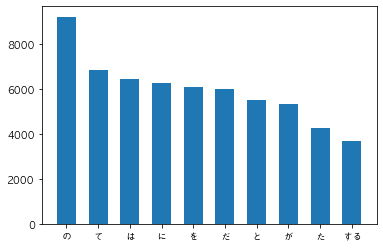

In [22]:
#matplotlibrcファイルのfont.familyをAppleGothicに変更。
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
l = c.most_common()[:10]
width = 0.6
ax.bar([t[0] for t in l], [t[1] for t in l], width)
ax.set_xticks([t[0] for t in l])

### 特殊なスライス(Numpy, Pytorch)
list型[:,1] #listの全要素の1番目たちのlist  
list型[:,0] #listの全要素の0番目たちのlistを返す

# 37.「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

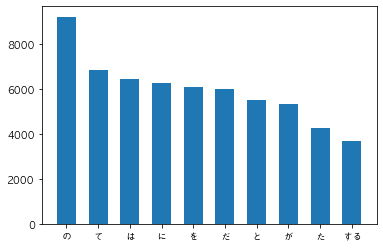

In [5]:
from collections import Counter
import matplotlib.pyplot as plt

words_with_neko = []
for sentence in sentences:
    if "猫" in [d["base"] for d in sentence]:
        for d in sentence:
            if d["base"] != "猫" and d["pos"] != "記号":
                words_with_neko.append(d["base"])
                
c_with_neko = Counter(words_with_neko)
top10_words_with_neko = c_with_neko.most_common()[:10]
top10_words_with_neko_list = [b[0] for b in top10_words_with_neko]

words_q37 = []
for sentence in sentences:
    for d in sentence:
        if d["base"] in top10_words_with_neko_list:
            words_q37.append(d["base"])
            
c_q37 = Counter(words_q37)
l = c_q37.most_common()[:10]

fig, ax = plt.subplots()
width = 0.6
ax.bar([t[0] for t in l], [t[1] for t in l], width)
ax.set_xticks([t[0] for t in l])

# 38.ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

(array([7565., 1384.,  606.,  364.,  253.,  158.,  119.,   94.,   64.,
          63.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 10 Patch objects>)

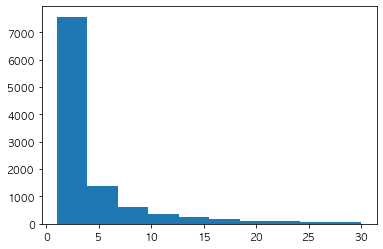

In [10]:
import matplotlib.pyplot as plt

counts = [w[1] for w in c.most_common()]
plt.hist(counts, range=(1, 30))

# 39.Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

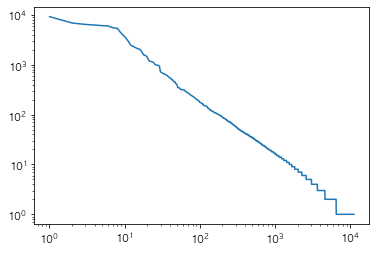

In [12]:
import matplotlib.pyplot as plt

ranks_and_counts = [(rank, count[1]) for rank, count in enumerate(c.most_common(), 1)]

fig, ax = plt.subplots()
ax.plot([rc[0] for rc in ranks_and_counts], [rc[1] for rc in ranks_and_counts])
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()